### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [5]:
import pandas as pd

# Load the flight price dataset
file_path = 'flight_price.xlsx'
flight_data = pd.read_excel(file_path)

# Examine the dimensions of the dataset
flight_data.shape

(10683, 11)

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

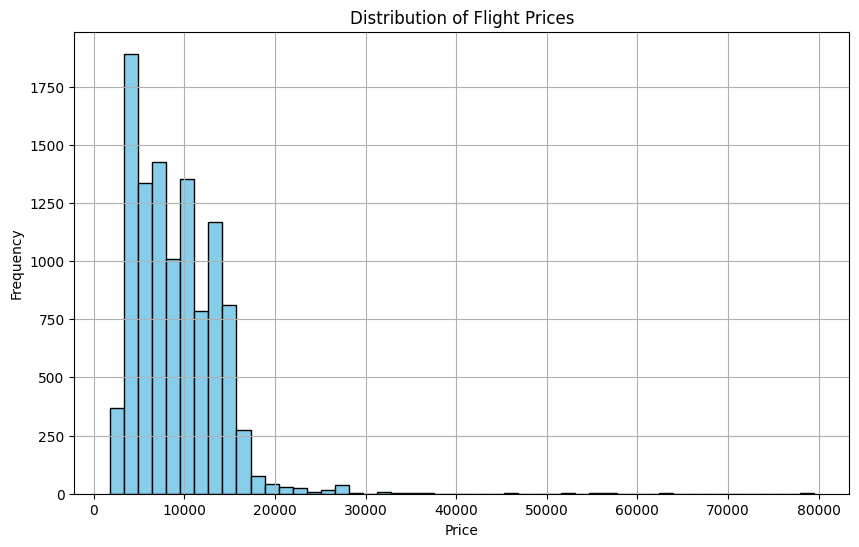

In [8]:
import matplotlib.pyplot as plt

# Extract the Price column for the histogram
flight_prices = flight_data['Price']

# Create a histogram to visualize the distribution of flight prices
plt.figure(figsize=(10, 6))
plt.hist(flight_prices, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [9]:
min_price = flight_data['Price'].min()
max_price = flight_data['Price'].max()
price_range = max_price - min_price

print(f'Min Price {min_price}')
print(f'Max Price {max_price}')
print(f'Price Range {price_range}')

Min Price 1759
Max Price 79512
Price Range 77753


### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines. 

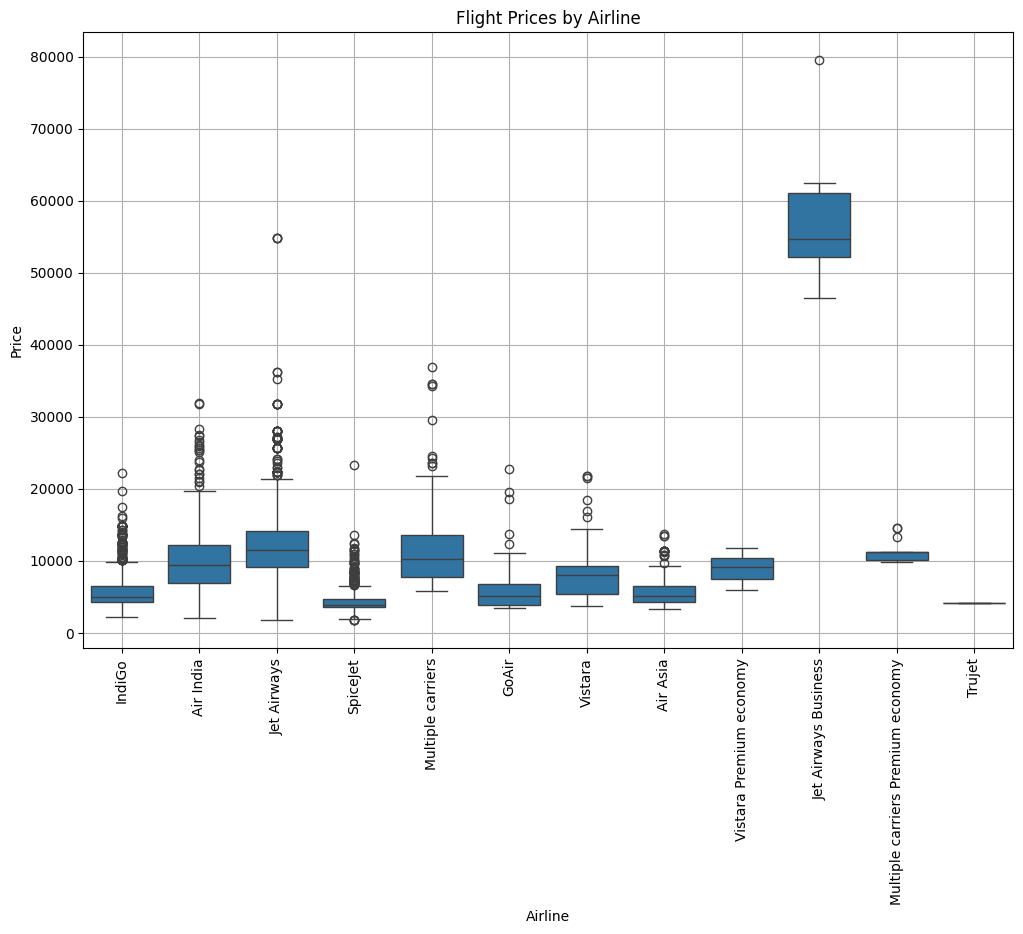

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flight_data = pd.read_excel('flight_price.xlsx')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=flight_data)
plt.xticks(rotation=90)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

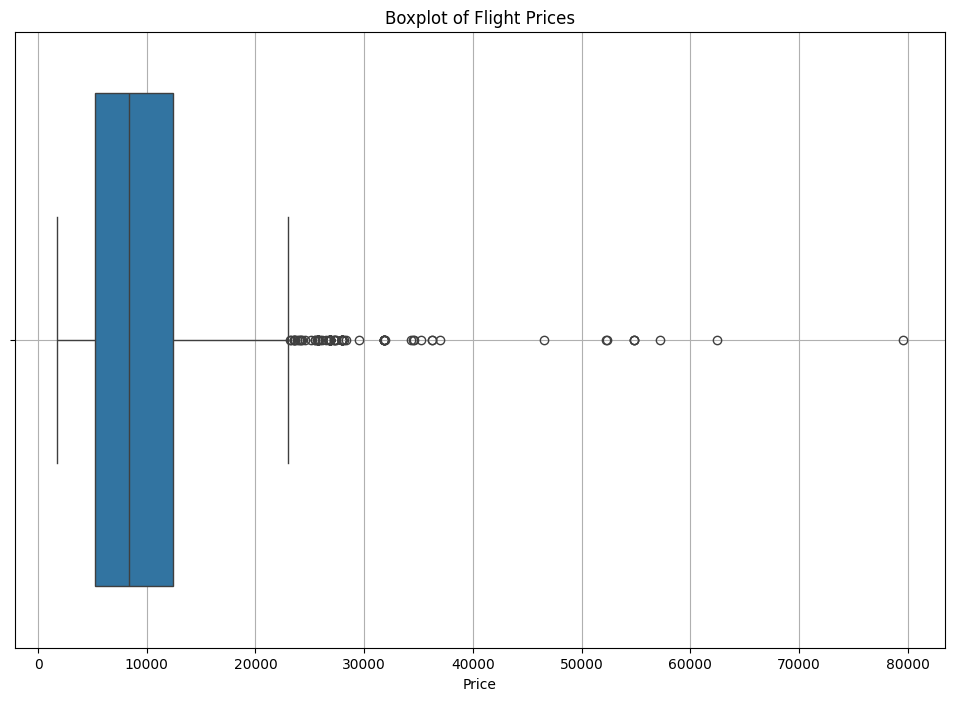

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flight_data = pd.read_excel('flight_price.xlsx')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Price', data=flight_data)
plt.title('Boxplot of Flight Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

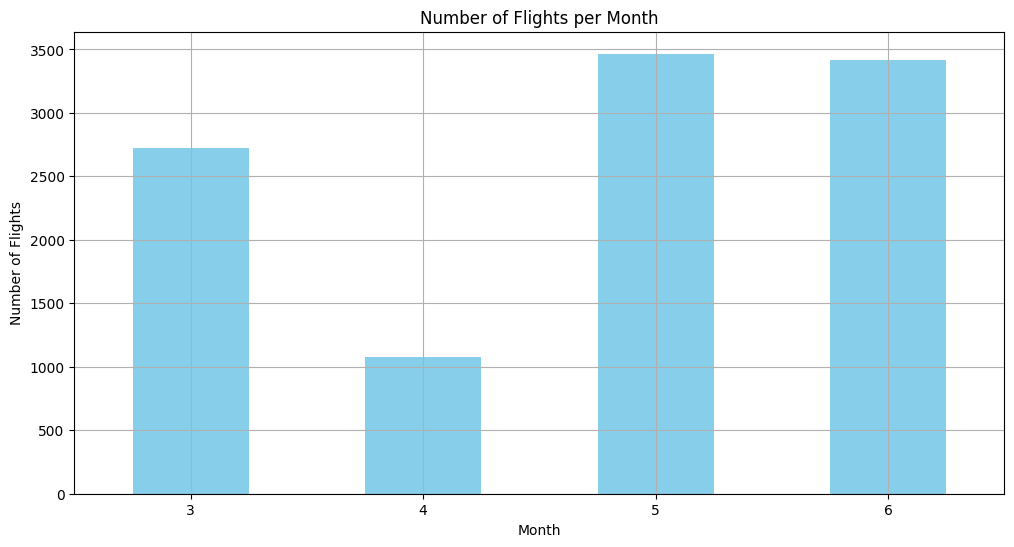

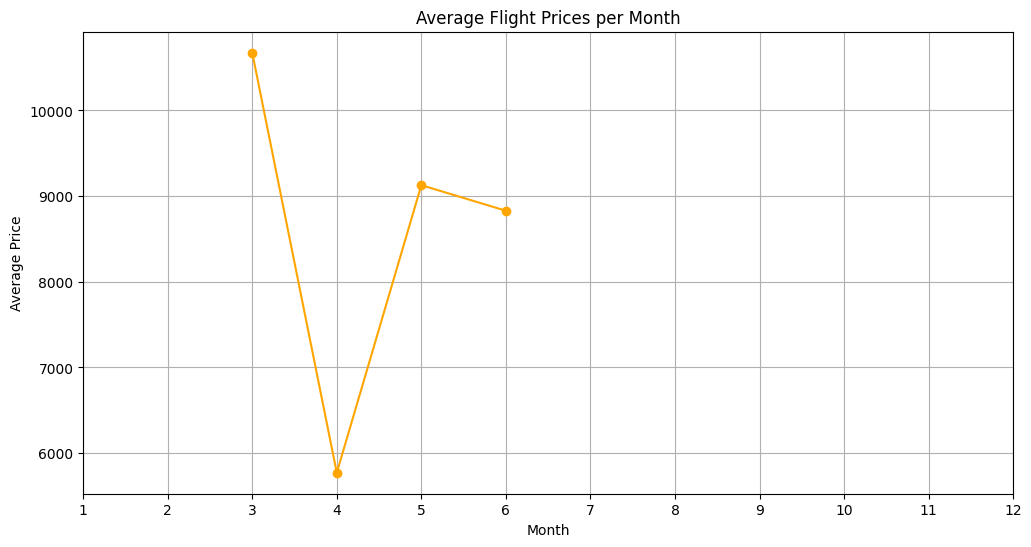

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'flight_price.xlsx'
flight_data = pd.read_excel(file_path)

# Extract Month and Year from Date_of_Journey
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'], format='%d/%m/%Y')
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Year'] = flight_data['Date_of_Journey'].dt.year

# Analyze Flight Counts by Month
monthly_flight_counts = flight_data.groupby('Month').size()

# Analyze Average Flight Prices by Month
average_prices = flight_data.groupby('Month')['Price'].mean()

# Plotting flight counts by month
plt.figure(figsize=(12, 6))
monthly_flight_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Plotting average flight prices by month
plt.figure(figsize=(12, 6))
average_prices.plot(kind='line', marker='o', color='orange')
plt.title('Average Flight Prices per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

To identify trends in flight prices, you should analyze several key features of the dataset. Here are the features and corresponding visualizations that would be useful:

### Key Features to Analyze

1. **Date_of_Journey**: Analyzing flight prices over time (daily, monthly, yearly) can reveal seasonal trends.
2. **Airline**: Different airlines may have different pricing strategies, so comparing prices across airlines can provide insights.
3. **Source and Destination**: Prices may vary based on the route, so analyzing prices by source and destination pairs is crucial.
4. **Total_Stops**: The number of stops can impact prices; typically, non-stop flights are more expensive.
5. **Duration**: The length of the flight might correlate with the price.

### Visualizations

1. **Time Series Analysis**: Use line plots to visualize how prices change over time.
2. **Boxplots**: Compare prices across different airlines and routes.
3. **Heatmaps**: Show the average prices for different source and destination pairs.
4. **Scatter Plots**: Explore the relationship between flight duration and prices.

### Code to Analyze Trends

Here's how you can implement the analysis and generate the visualizations:

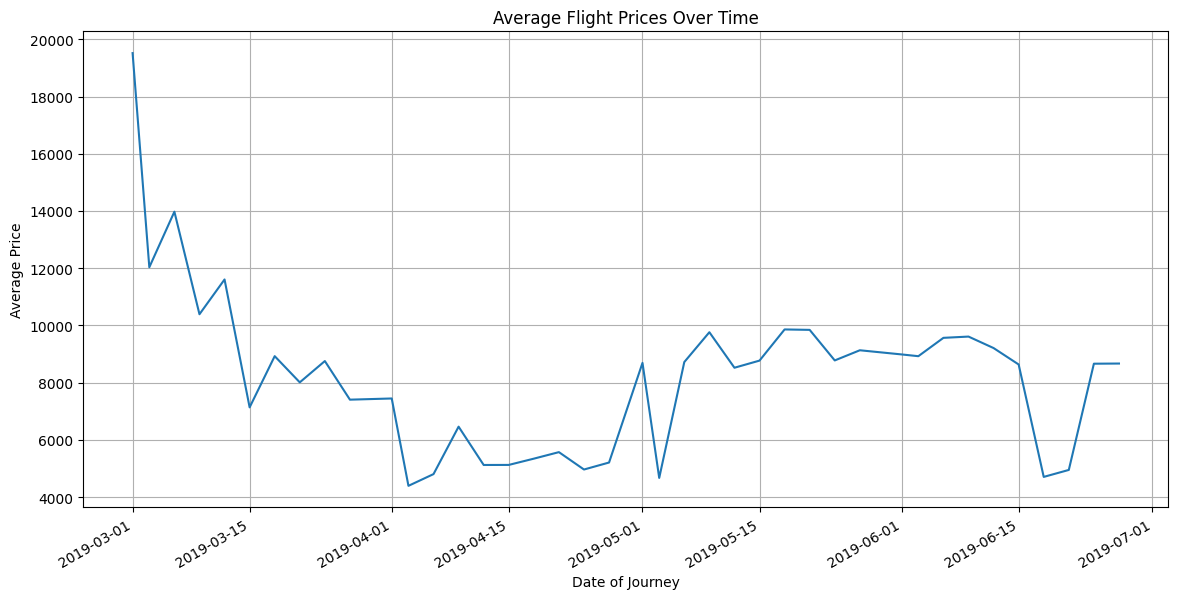

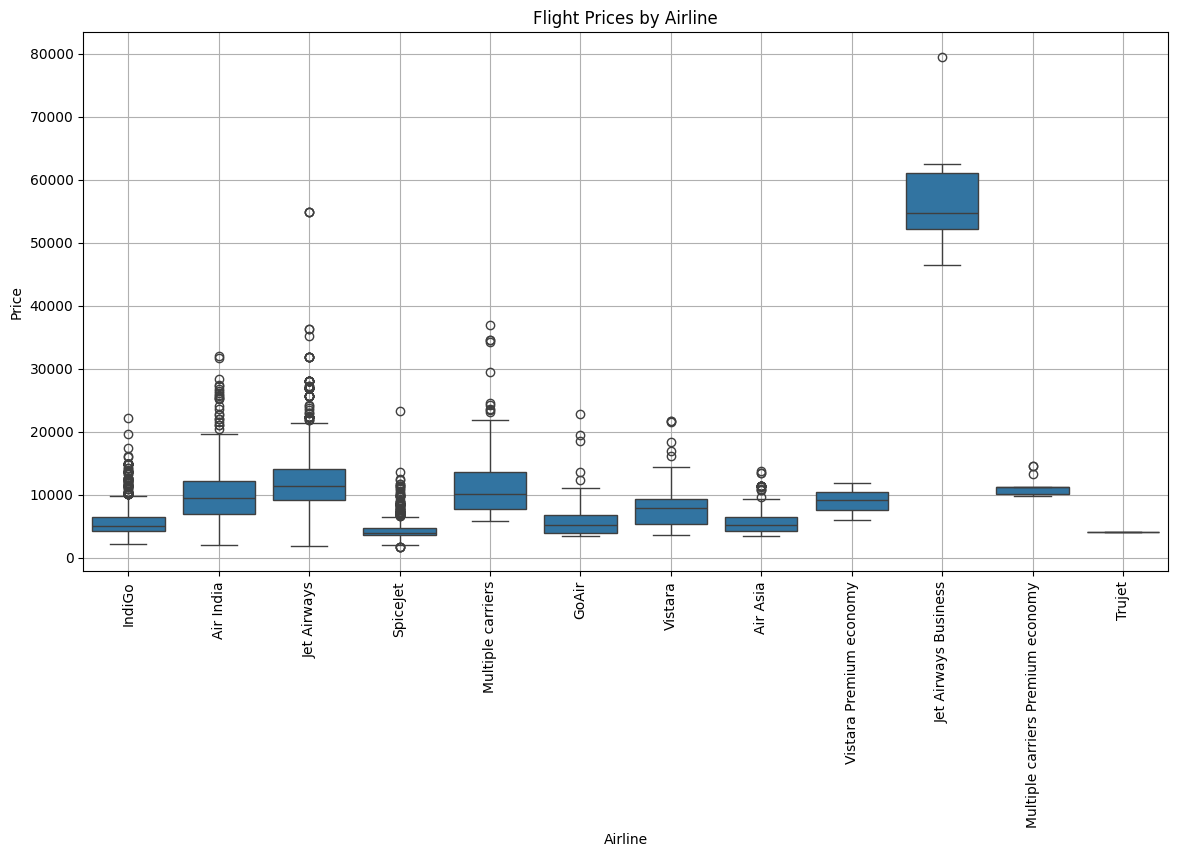

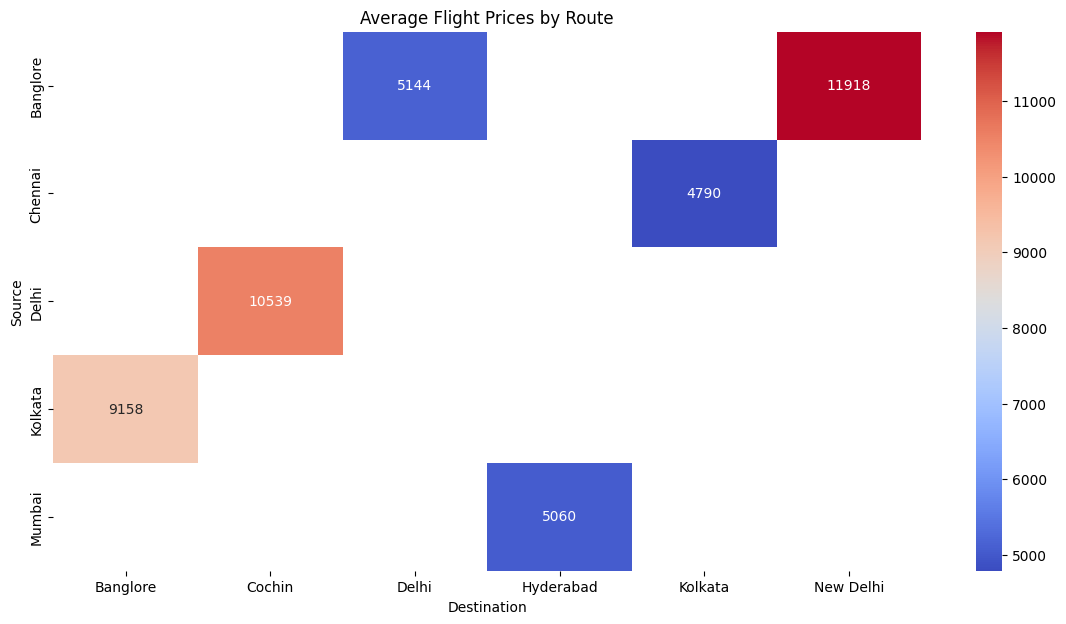

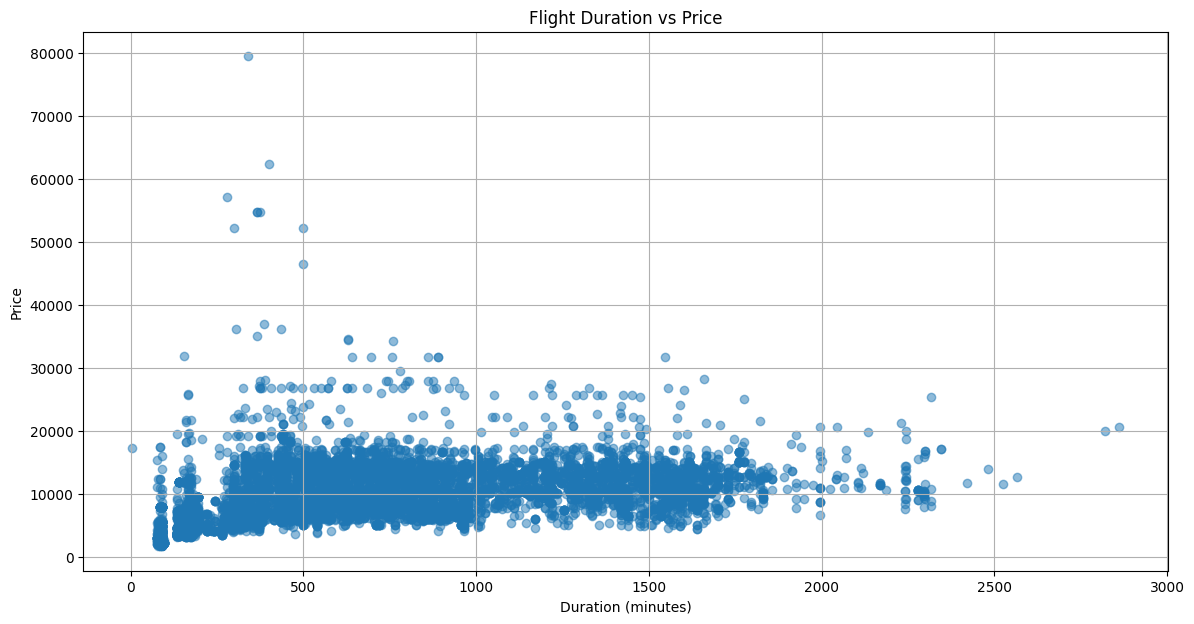

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'flight_price.xlsx'
flight_data = pd.read_excel(file_path)

# Extract relevant date features
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'], format='%d/%m/%Y')
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Year'] = flight_data['Date_of_Journey'].dt.year

# 1. Time Series Analysis of Flight Prices
plt.figure(figsize=(14, 7))
flight_data.groupby('Date_of_Journey')['Price'].mean().plot()
plt.title('Average Flight Prices Over Time')
plt.xlabel('Date of Journey')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# 2. Boxplot of Prices by Airline
plt.figure(figsize=(14, 7))
sns.boxplot(x='Airline', y='Price', data=flight_data)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# 3. Heatmap of Prices by Source and Destination
avg_price_route = flight_data.pivot_table(index='Source', columns='Destination', values='Price', aggfunc='mean')
plt.figure(figsize=(14, 7))
sns.heatmap(avg_price_route, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Average Flight Prices by Route')
plt.xlabel('Destination')
plt.ylabel('Source')
plt.show()

# 4. Scatter Plot of Duration vs Price
# Convert duration to minutes
def convert_duration_to_minutes(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        if 'm' in duration:
            minutes = int(duration.split('h')[1].split('m')[0])
    else:
        minutes = int(duration.split('m')[0])
    return hours * 60 + minutes

flight_data['Duration_Minutes'] = flight_data['Duration'].apply(convert_duration_to_minutes)

plt.figure(figsize=(14, 7))
plt.scatter(flight_data['Duration_Minutes'], flight_data['Price'], alpha=0.5)
plt.title('Flight Duration vs Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Explanation

- **Time Series Analysis**: The line plot shows how average flight prices change over time, helping identify any seasonal trends or significant fluctuations.
- **Boxplot by Airline**: The boxplot compares the distribution of flight prices across different airlines, highlighting variations and potential outliers.
- **Heatmap by Route**: The heatmap provides a visual representation of average flight prices for different source and destination pairs, making it easy to spot expensive and cheaper routes.
- **Scatter Plot of Duration vs Price**: This plot helps explore the relationship between flight duration and price, indicating whether longer flights tend to be more expensive.

By presenting these visualizations to your team, you can provide a comprehensive overview of flight price trends, helping to inform strategic decisions.

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

Ans. To analyze the factors that affect flight prices in a dataset, you'll need to consider various features that could potentially influence prices. Here's a structured approach to identifying and analyzing these factors and presenting your findings to the management team:

### Step 1: Identify Relevant Features
Based on industry knowledge and potential impact, consider the following features:

1. **Date and Time-Related Features**:
   - Departure Date
   - Booking Date
   - Day of the Week
   - Seasonality (holiday periods, peak travel seasons)
   - Time of Day (departure and arrival times)

2. **Flight Characteristics**:
   - Flight Duration
   - Number of Stops (direct vs. layovers)
   - Airline (carrier)
   - Flight Class (economy, business, first class)

3. **Route Characteristics**:
   - Origin and Destination Airports (distance between, airport popularity)
   - Route Popularity (demand for specific routes)

4. **Passenger Characteristics**:
   - Number of Passengers (group bookings vs. individual)
   - Passenger Type (adult, child, senior)

5. **Economic Factors**:
   - Fuel Prices
   - Economic Indicators (GDP, inflation rates)

6. **Competitor Pricing**:
   - Prices of similar flights from competing airlines

7. **Booking Channels**:
   - Source of Booking (online, travel agent, direct through airline)

### Step 2: Data Preprocessing
1. **Data Cleaning**: Handle missing values, outliers, and incorrect data entries.
2. **Feature Engineering**: Create new features like days until departure, week of the year, etc.
3. **Normalization/Standardization**: Normalize continuous variables to make them comparable.

### Step 3: Exploratory Data Analysis (EDA)
1. **Univariate Analysis**: Analyze the distribution of individual features using histograms, box plots, and summary statistics.
2. **Bivariate Analysis**: Explore relationships between flight prices and each feature using scatter plots, correlation matrices, and heatmaps.
3. **Multivariate Analysis**: Use pair plots and other visualizations to understand interactions between multiple features.

### Step 4: Statistical Analysis and Modeling
1. **Correlation Analysis**: Use Pearson/Spearman correlation to identify linear/non-linear relationships.
2. **Regression Analysis**: Build regression models (linear regression, multiple regression) to quantify the impact of each feature on flight prices.
3. **Machine Learning Models**: Apply more sophisticated models like decision trees, random forests, and gradient boosting to capture non-linear relationships and interactions.
4. **Feature Importance**: Use model-specific methods (like feature importance in tree-based models) and model-agnostic methods (like SHAP values) to determine the importance of each feature.

### Step 5: Presentation of Findings
1. **Executive Summary**:
   - Provide a high-level summary of the key findings, focusing on the most impactful factors affecting flight prices.

2. **Visualizations**:
   - Include visual aids such as bar charts, line graphs, and heatmaps to clearly illustrate the relationships and findings.
   - Highlight key trends, patterns, and anomalies.

3. **Detailed Analysis**:
   - Present detailed results of the statistical analysis and modeling.
   - Explain the rationale behind the chosen models and their performance metrics (e.g., R-squared, RMSE for regression models).

4. **Actionable Insights**:
   - Offer recommendations based on the analysis, such as pricing strategies, optimizing flight schedules, or focusing on high-demand routes.
   - Suggest areas for further investigation if needed.

5. **Appendix**:
   - Include technical details, additional charts, and any supporting data analysis for reference.

### Example Presentation Outline
1. **Title Slide**: "Analysis of Factors Affecting Flight Prices"
2. **Introduction**: Objective and scope of the analysis.
3. **Data Overview**: Description of the dataset and preprocessing steps.
4. **Exploratory Data Analysis**: Key findings from univariate and bivariate analysis.
5. **Modeling and Results**: Detailed results from regression and machine learning models.
6. **Feature Importance**: Discussion on the most significant factors.
7. **Recommendations**: Strategic recommendations for pricing and operations.
8. **Conclusion**: Summary of key points and next steps.
9. **Q&A**: Open the floor for questions from the management team.

By following this structured approach, you'll be able to provide a comprehensive analysis of the factors affecting flight prices and present your findings effectively to the management team.

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

playStore=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
playStore.shape

(10841, 13)

### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [4]:
playStore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
categories = playStore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

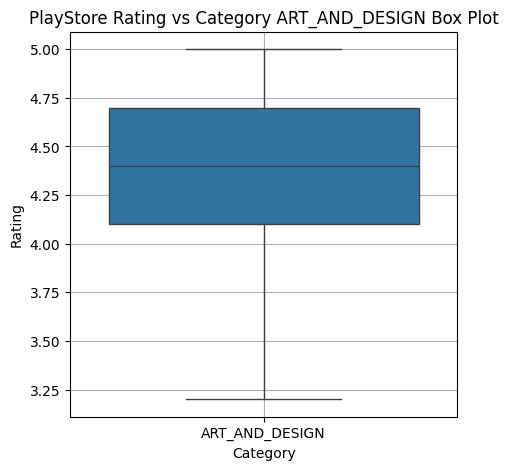

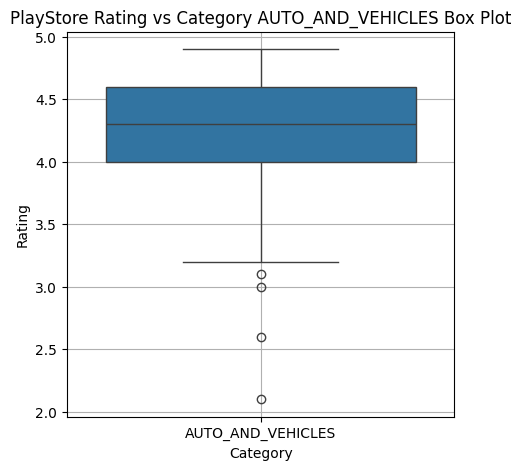

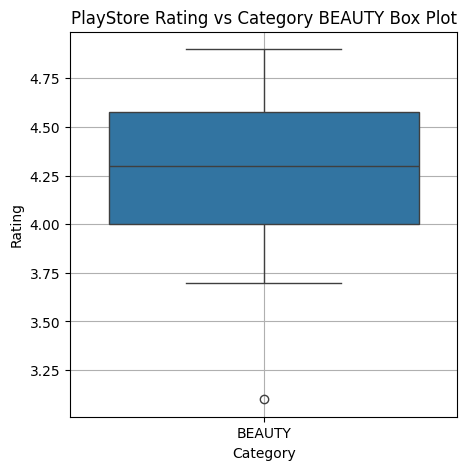

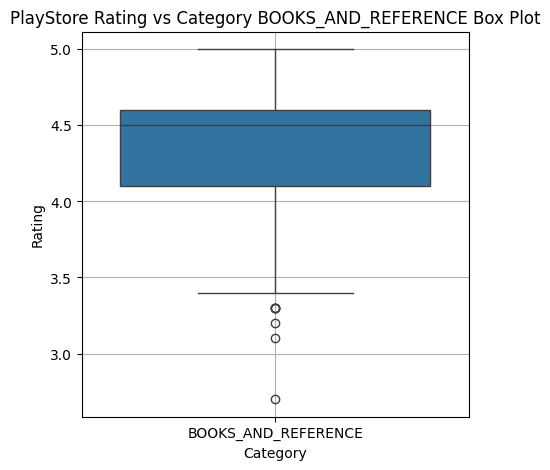

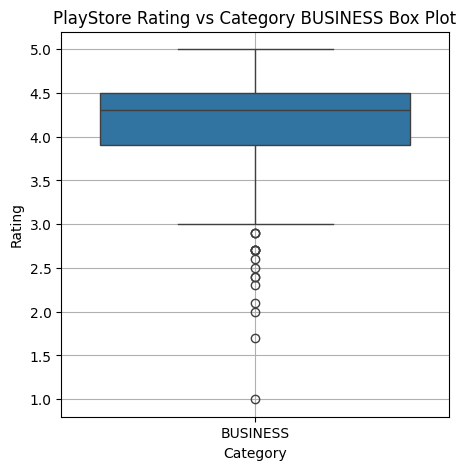

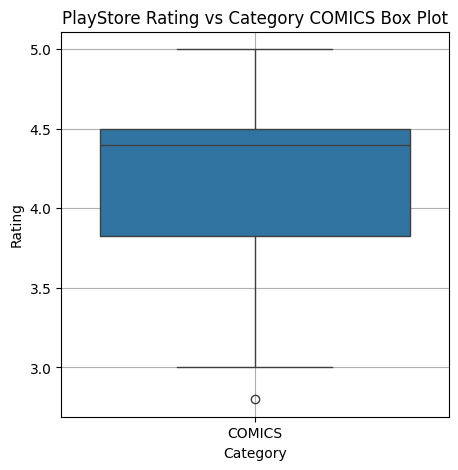

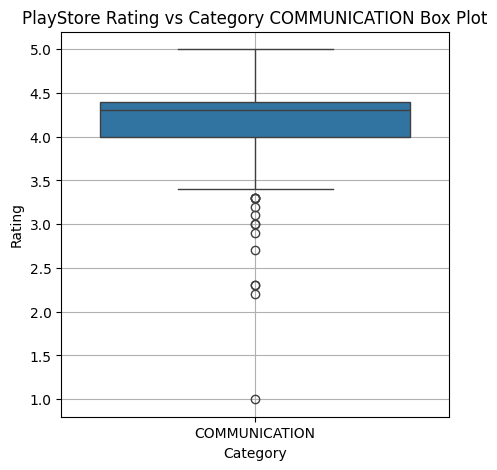

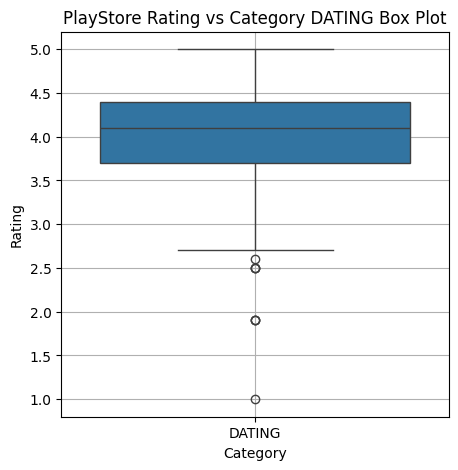

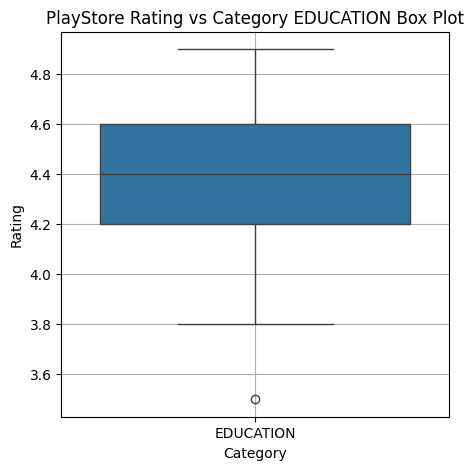

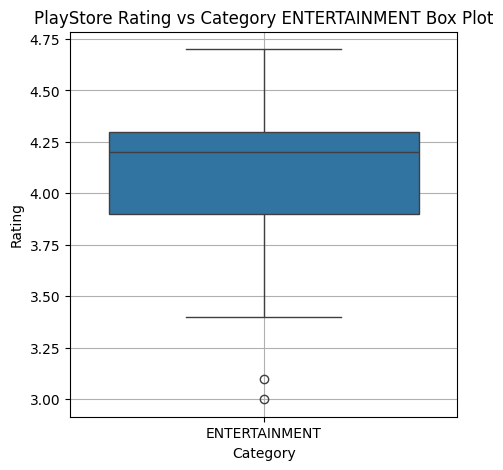

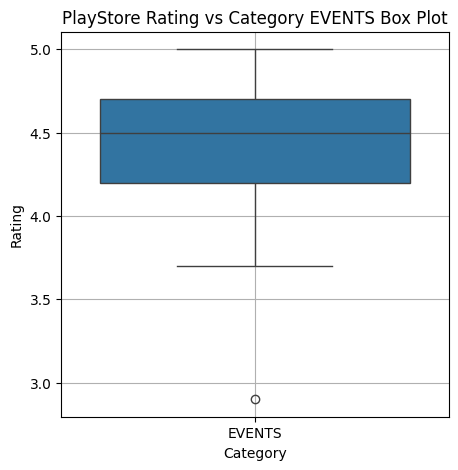

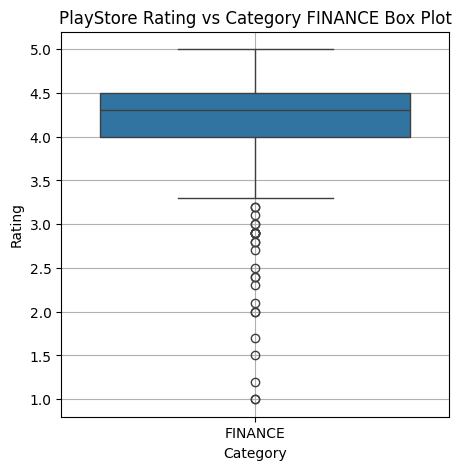

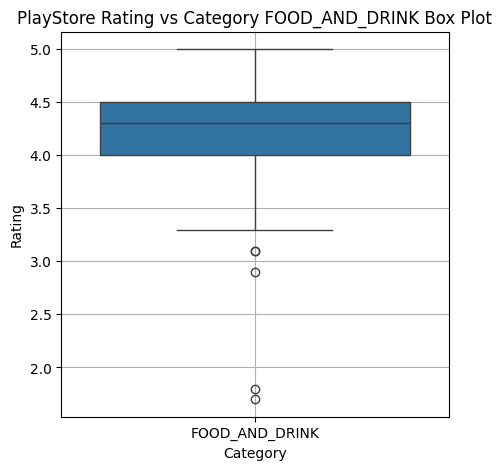

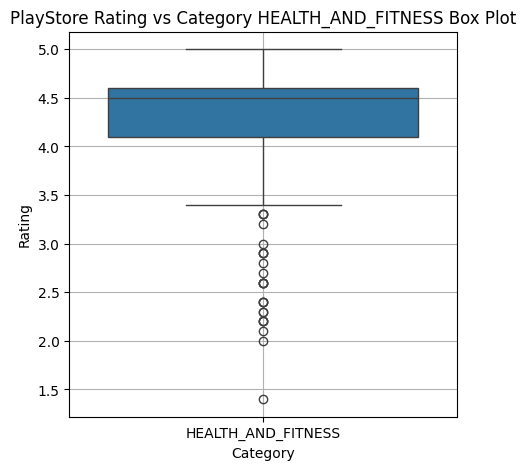

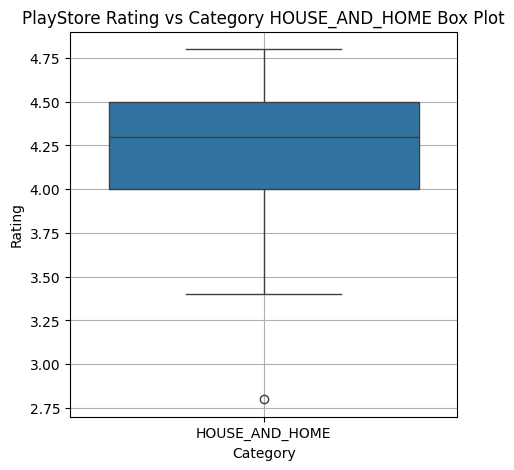

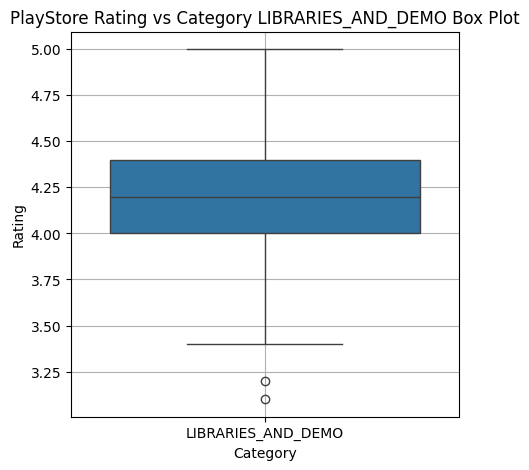

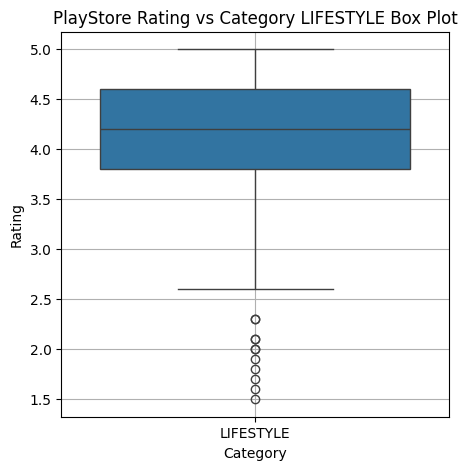

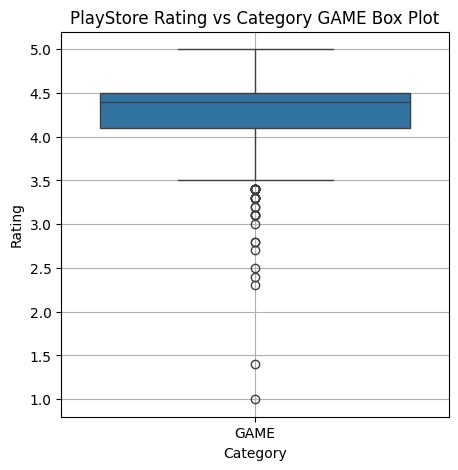

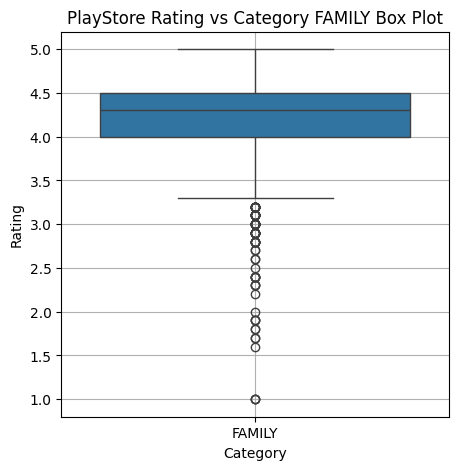

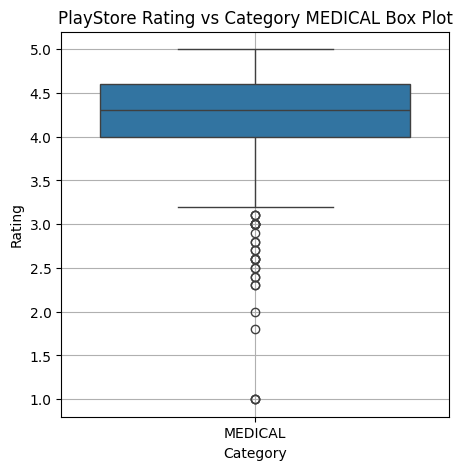

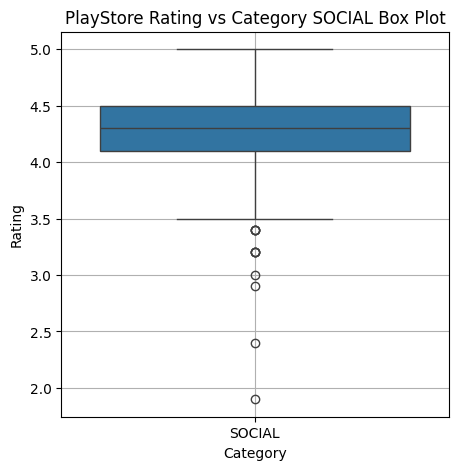

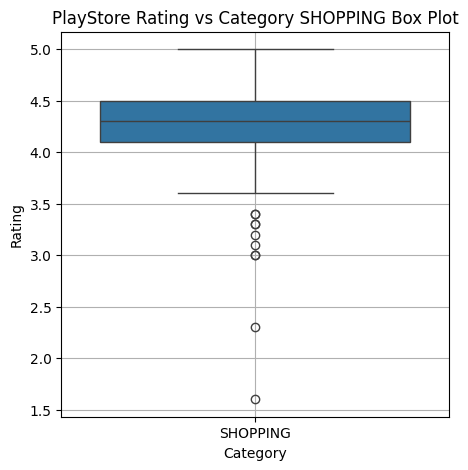

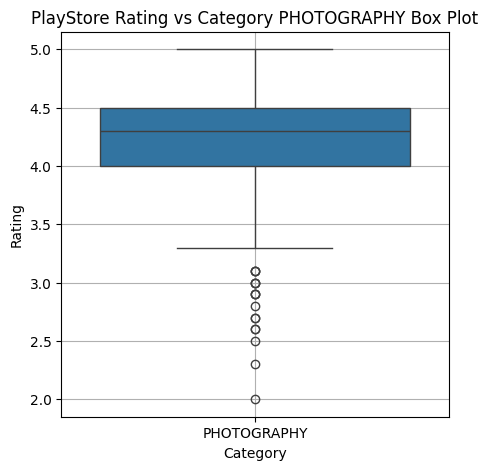

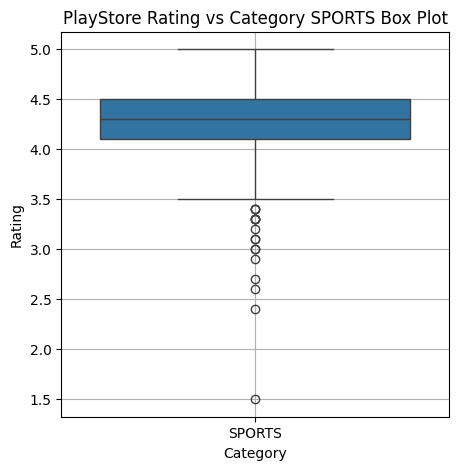

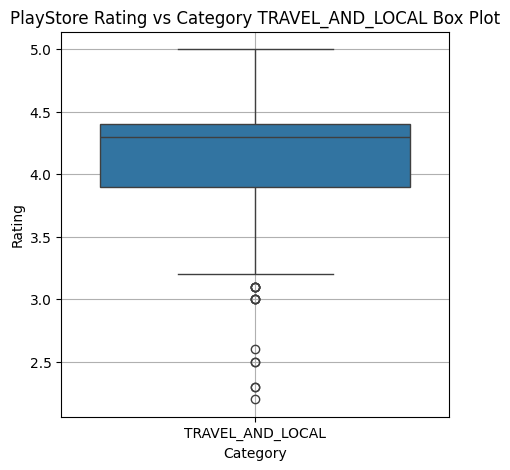

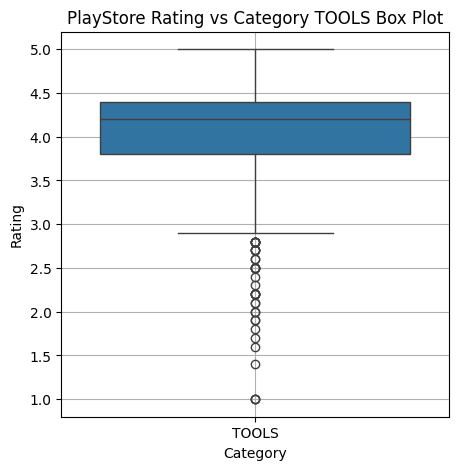

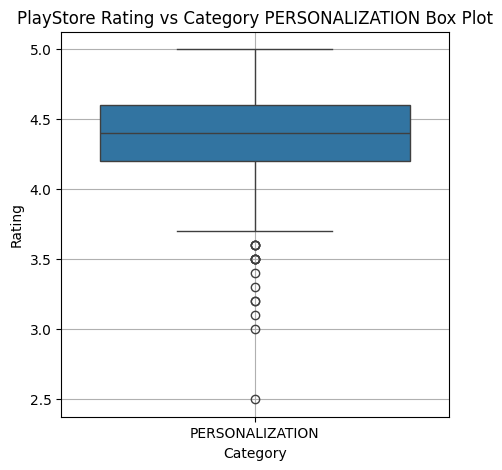

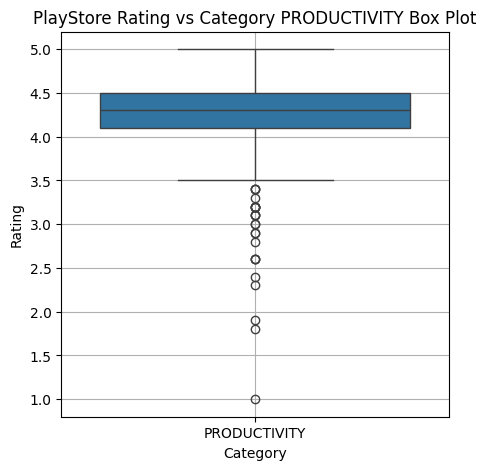

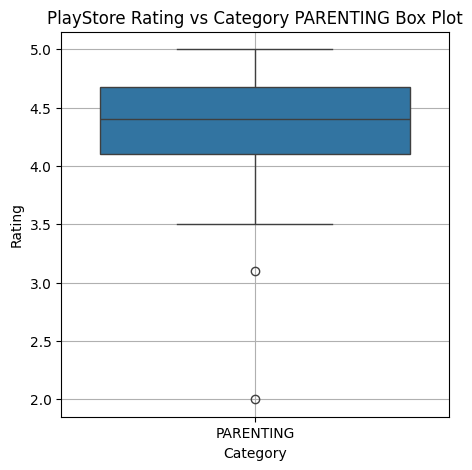

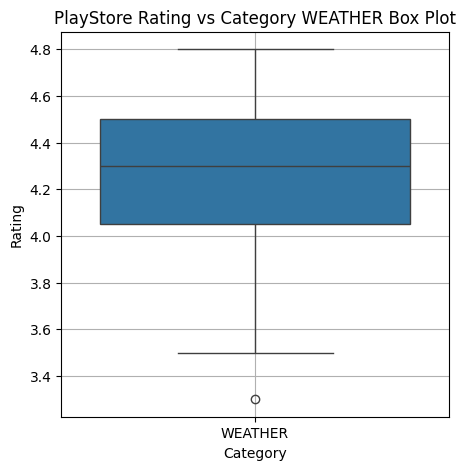

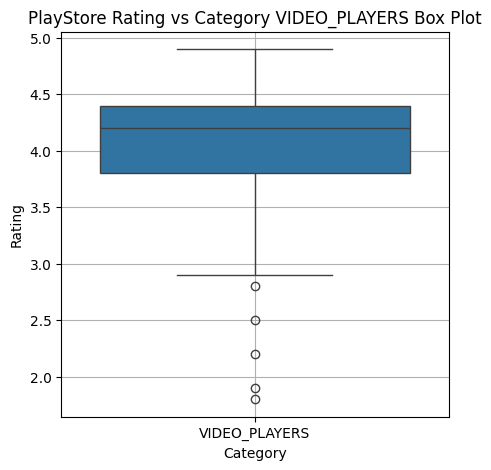

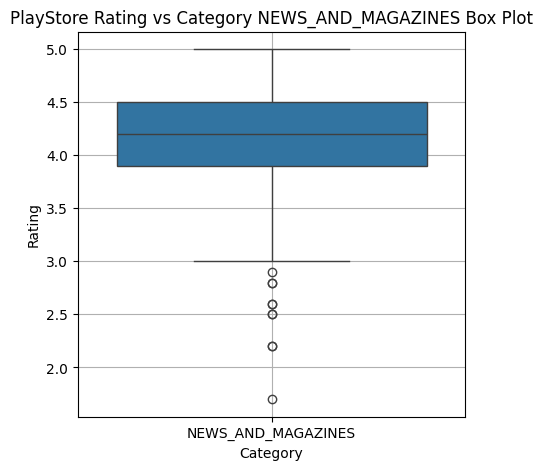

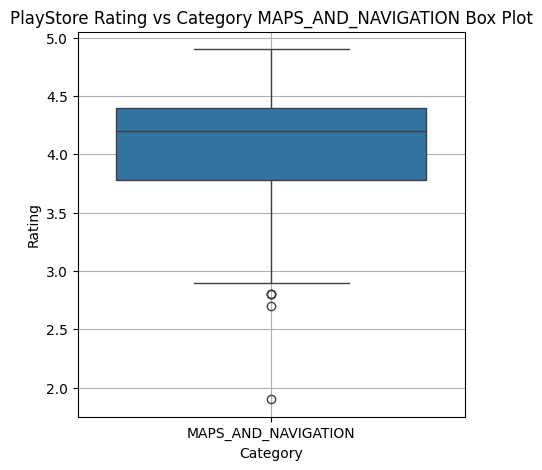

In [19]:
for cat in categories[:-1]:
    tempdf = playStore[playStore['Category'] == cat]
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='Category', y='Rating', data=tempdf)
    plt.title(f'PlayStore Rating vs Category {cat} Box Plot')
    # plt.xlabel(f'Category: {cat}')
    plt.ylabel('Rating')
    # plt.xticks(rotation=90)
    plt.grid(True)
plt.show()

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.